## Machine Learning - Random Forests
***
Using what I learned in the previous machine learning models, I am now going to try a Random Forest Regressor and Random Forest Classifier.  `Targets by raw counts` worked best for regression and `targets by percent of total plan selections` worked best for classifiers.  As such, I will be using the appropriate datasets for each Random Forest Model

In [3]:
# Import necessary tools
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import AdaBoostClassifier

# Make plots pretty
sns.set()

# Random Forest Regressor

In [4]:
# Read in Data
df = pd.read_csv('Combo_Cleaned.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,cfc,state,county,0-17,18-25,26-34,35-44,45-54,55-64,65+,...,platinum,gold,silver,bronze,catastrophic,new,active_renew,auto_renew,tps,Year
0,12109,FL,St. Johns County,1259.0,1093.0,1566.0,1684.0,2354.0,2963.0,41.0,...,1128.0,594.0,7209.0,1967.0,62.0,5875.0,3783.0,1302.0,10960.0,2015
1,10001,DE,Kent County,413.0,284.0,529.0,530.0,771.0,872.0,18.0,...,107.0,528.0,2136.0,629.0,17.0,1853.0,655.0,909.0,3417.0,2015
2,10003,DE,New Castle County,1964.0,1275.0,2487.0,2333.0,3288.0,3494.0,126.0,...,679.0,2406.0,8835.0,2943.0,104.0,7453.0,3340.0,4174.0,14967.0,2015
3,10005,DE,Sussex County,794.0,436.0,805.0,929.0,1453.0,2204.0,30.0,...,257.0,1144.0,4198.0,1032.0,20.0,3408.0,1531.0,1712.0,6651.0,2015
4,12001,FL,Alachua County,726.0,2161.0,2734.0,1867.0,2250.0,2940.0,41.0,...,1188.0,429.0,9169.0,1848.0,85.0,6443.0,4378.0,1898.0,12719.0,2015


In [5]:
# Create our X and y for the model with individual y's for each metallic tier.

# Our X Dropping the Metallic Tier Targets, String Data, and Categorical Year
X = df.drop(['cfc','state','county','platinum','gold','silver','bronze','catastrophic', 'Year',
             'tps'], axis=1).values

# Individual y's for Each Target Data
ycat = df.catastrophic.values
ybro = df.bronze.values
ysil = df.silver.values
ygold = df.gold.values
yplat = df.platinum.values

# Create List of Target Values and Names of Target Values
ys=[ycat, ybro, ysil, ygold, yplat]
ys_name = ['Catastrophic','Bronze','Silver','Gold','Platinum']

In [6]:
# Instantiate RandomForestRegressor for hyperparameter tuning.
rfr = RandomForestRegressor(random_state=42)

# Dictionary of hyperparameters to tune.
params_rfr = {
    'n_estimators':[300,400,500,600],
    'max_depth':[1,2,3,4,5,6],
    'min_samples_leaf':[.1,.2,.3,],
    'max_features':['log2','sqrt']
}

#Instantiate GridSearch model.
grid_rfr = GridSearchCV(estimator=rfr,
                       param_grid = params_rfr,
                       cv = 5,
                       scoring = 'neg_mean_squared_error',
                       n_jobs=-1)



In [23]:
# Set place value at start (0)
place = 0

# Iterate over metallic tiers and prine best parameters for each tier
for y in ys:
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state=42)
    
    # Fit training data
    grid_rfr.fit(X_train,y_train)
    
    # Predict on the test set and compute metrics
    best = grid_rfr.best_estimator_
    y_pred = best.predict(X_test)
    r2 = best.score(X_test, y_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse**(1/2)
    print(ys_name[place],'Best Parameters: \n',grid_rfr.best_params_,'\n')
    print(ys_name[place],'Best R^2: {:.2f}'.format(r2))
    print(ys_name[place],'Best MSE: {:.2f}'.format(mse))
    print(ys_name[place], 'Best RMSE: {:.2f}'.format(rmse),'\n')
    place+=1

Catastrophic Best Parameters: 
 {'max_depth': 1, 'max_features': 'log2', 'min_samples_leaf': 0.1, 'n_estimators': 400} 

Catastrophic Best R^2: 0.27
Catastrophic Best MSE: 10097.39
Catastrophic Best RMSE: 100.49 

Bronze Best Parameters: 
 {'max_depth': 1, 'max_features': 'log2', 'min_samples_leaf': 0.1, 'n_estimators': 600} 

Bronze Best R^2: 0.17
Bronze Best MSE: 12235310.64
Bronze Best RMSE: 3497.90 

Silver Best Parameters: 
 {'max_depth': 1, 'max_features': 'log2', 'min_samples_leaf': 0.1, 'n_estimators': 400} 

Silver Best R^2: 0.16
Silver Best MSE: 133070329.32
Silver Best RMSE: 11535.61 

Gold Best Parameters: 
 {'max_depth': 1, 'max_features': 'log2', 'min_samples_leaf': 0.1, 'n_estimators': 600} 

Gold Best R^2: 0.22
Gold Best MSE: 691536.40
Gold Best RMSE: 831.59 

Platinum Best Parameters: 
 {'max_depth': 1, 'max_features': 'log2', 'min_samples_leaf': 0.1, 'n_estimators': 400} 

Platinum Best R^2: 0.21
Platinum Best MSE: 61290.96
Platinum Best RMSE: 247.57 



It does not appear that a Random Forest Regressor will produce a better model than our Huber regressor model.  That said, using an ensemble algorithm with the Huber Regressor may produce even better results than the Huber Regressor itself. <br><br>
Before moving on, I would like to plot feature importance using the Random Forest Regressor to see if it matches the Feature Importance plot of the Lasso model.  Silver tier will be used for this exploration.

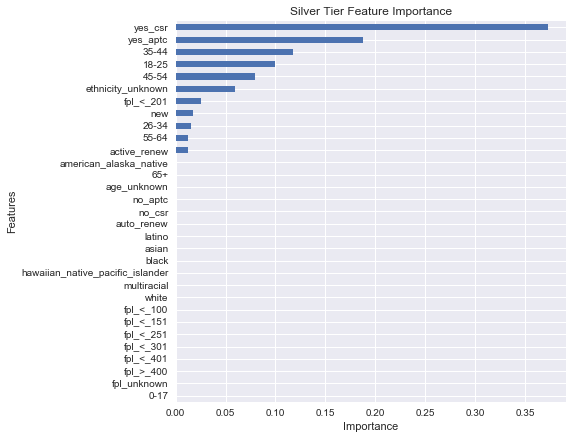

In [10]:
# Instantiate Silver Regressor using hyperparameters from tuning.
rfr_silver= RandomForestRegressor(random_state=42, n_estimators=400, max_depth=1, min_samples_leaf=.1)

# Reset X as DataFrame instead of Numpy array.
X = df.drop(['cfc','state','county','platinum','gold','silver','bronze','catastrophic', 'Year',
             'tps'], axis=1)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X,ysil, test_size=.3, random_state=42)

# Fit data
rfr_silver.fit(X_train,y_train)

# Get sorted feature importances
importances = pd.Series(rfr_silver.feature_importances_, index=X.columns).sort_values()

#Plot the sorted importances
_ = plt.subplots(1,1, figsize=(7,7))
_ = importances.plot(kind='barh')
_ = plt.title('Silver Tier Feature Importance')
_ = plt.xlabel('Importance')
_ = plt.ylabel('Features')

plt.show()

Like the Lasso model feature evaluation, having a CSR is the most feature for the Silver tier.  Other similarities include:
-  'Yes APTC'
-  'Ages 26-34'
-  'FPL < 201'
-  'Active Renewal

***
# Random Forest Classifier

In [11]:
# Read in Data
dfp = pd.read_csv('Combo_Percents.csv')
dfp.drop('Unnamed: 0', axis=1, inplace=True)
dfp.head()

,cfc,state,county,0-17,18-25,26-34,35-44,45-54,55-64,65+,...,platinum,gold,silver,bronze,catastrophic,new,active_renew,auto_renew,tps,Year
0,12109,FL,St. Johns County,1259.0,1093.0,1566.0,1684.0,2354.0,2963.0,41.0,...,0.10,0.05,0.66,0.18,0.01,5875.0,3783.0,1302.0,10960.0,2015
1,10001,DE,Kent County,413.0,284.0,529.0,530.0,771.0,872.0,18.0,...,0.03,0.15,0.63,0.18,0.00,1853.0,655.0,909.0,3417.0,2015
2,10003,DE,New Castle County,1964.0,1275.0,2487.0,2333.0,3288.0,3494.0,126.0,...,0.05,0.16,0.59,0.20,0.01,7453.0,3340.0,4174.0,14967.0,2015
3,10005,DE,Sussex County,794.0,436.0,805.0,929.0,1453.0,2204.0,30.0,...,0.04,0.17,0.63,0.16,0.00,3408.0,1531.0,1712.0,6651.0,2015
4,12001,FL,Alachua County,726.0,2161.0,2734.0,1867.0,2250.0,2940.0,41.0,...,0.09,0.03,0.72,0.15,0.01,6443.0,4378.0,1898.0,12719.0,2015


In [12]:
# Create the X and y for the model with individual y's for each metallic tier.

# Our X Dropping the Metallic Tier Targets, String Data, Categorical Year, and TPS
Xp = dfp.drop(['cfc','state','county','platinum','gold','silver','bronze','catastrophic', 'Year',
               'tps'],axis=1).values

# Individual y's for Each Target Data
ycatp = (dfp.catastrophic.values * 100).astype(int)
ybrop = (dfp.bronze.values *100).astype(int)
ysilp = (dfp.silver.values * 100).astype(int)
ygoldp = (dfp.gold.values * 100).astype(int)
yplatp = (dfp.platinum.values * 100).astype(int)

# Create List of Target Values for Percent Data
ysp=[ycatp, ybrop, ysilp, ygoldp, yplatp]

In [13]:
# Instantiate RandomForestRegressor for hyperparameter tuning.
rfc = RandomForestClassifier(random_state=42)

# Dictionary of hyperparameters to tune.
params_rfc = {
    'max_depth':[1,2,3,4,5,6],
    'min_samples_leaf':[.04,.06,.08,.1],
    'max_features':[.2,.4,.6,.8]
}

#Instantiate GridSearch model.
grid_rfc = GridSearchCV(estimator=rfc,
                       param_grid = params_rfc,
                       cv = 5,
                       scoring = 'accuracy',
                       n_jobs=-1)

In [14]:
# Set place value at start (0)
place = 0

# Iterate over metallic tiers and prine best parameters for each tier
for y in ysp:
    X_train, X_test, y_train, y_test = train_test_split(Xp,y, test_size=.3, random_state=42)
    
    # Fit training data
    grid_rfc.fit(X_train,y_train)
    
    # Predict on the test set and compute metrics
    score = grid_rfc.best_score_
    best = grid_rfc.best_estimator_
    test_acc = best.score(X_test,y_test)
    print(ys_name[place],'Best Parameters: \n',grid_rfc.best_params_,'\n')
    print(ys_name[place],'Best CV Accuracy: {:.3f}'.format(score))
    print(ys_name[place],'Best Test Accuracy: {:.3f}'.format(test_acc), '\n')
    place+=1

Catastrophic Best Parameters: 
 {'max_depth': 3, 'max_features': 0.4, 'min_samples_leaf': 0.08} 

Catastrophic Best CV Accuracy: 0.759
Catastrophic Best Test Accuracy: 0.757 



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Bronze Best Parameters: 
 {'max_depth': 6, 'max_features': 0.8, 'min_samples_leaf': 0.04} 

Bronze Best CV Accuracy: 0.084
Bronze Best Test Accuracy: 0.076 



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Silver Best Parameters: 
 {'max_depth': 4, 'max_features': 0.8, 'min_samples_leaf': 0.04} 

Silver Best CV Accuracy: 0.068
Silver Best Test Accuracy: 0.055 



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Gold Best Parameters: 
 {'max_depth': 5, 'max_features': 0.4, 'min_samples_leaf': 0.04} 

Gold Best CV Accuracy: 0.345
Gold Best Test Accuracy: 0.344 



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Platinum Best Parameters: 
 {'max_depth': 1, 'max_features': 0.2, 'min_samples_leaf': 0.04} 

Platinum Best CV Accuracy: 0.812
Platinum Best Test Accuracy: 0.818 



With a little tweaking the Random Forest Classifier might be a better model for the Catastrophic, and possibly Platinum tiers.

In [58]:
# Convert 12%+ to 11% in the platinum targets for classification improvement
for n in range(len(yplatp)):
    if yplatp[n] in [12,13,14,15]:
        yplatp[n]=11
np.unique(yplatp, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 array([3689,  277,  197,  153,   66,   42,   25,   26,   13,   14,   10,
          20], dtype=int64))

In [59]:
# Split training and testing data
X_train, X_test, y_train, y_test = train_test_split(Xp,yplatp, test_size=.2, random_state=42)

# Fit training data
grid_rfc.fit(X_train,y_train)

# Predict on the test set and compute metrics
score = grid_rfc.best_score_
best = grid_rfc.best_estimator_
test_acc = best.score(X_test,y_test)
print('Platinum Best Parameters: \n',grid_rfc.best_params_,'\n')
print('Platinum Best CV Accuracy: {:.3f}'.format(score))
print('Platinum Best Test Accuracy: {:.3f}'.format(test_acc))

Platinum Best Parameters: 
 {'max_depth': 1, 'max_features': 0.2, 'min_samples_leaf': 0.04} 

Platinum Best CV Accuracy: 0.809
Platinum Best Test Accuracy: 0.836


In [49]:
#Instantiate Catastrophic model.
cat_rfc = RandomForestClassifier(random_state=42,
                                 max_depth=3,
                                 max_features = .4,
                                 min_samples_leaf = .08,
                                 n_jobs=-1)
# Split training and testing data
X_train, X_test, y_train, y_test = train_test_split(Xp,ycatp, test_size=.3, random_state=42)

# Fit Data
cat_rfc.fit(X_train,y_train)
train_acc = accuracy_score(y_train, cat_rfc.predict(X_train))
test_acc = accuracy_score(y_test, cat_rfc.predict(X_test))
print('Catastrophic Training Accuracy: {:.3f}'.format(train_acc))
print('Catastrophic Test Accuracy: {:.3f}'.format(test_acc))


Catastrophic Training Accuracy: 0.757
Catastrophic Test Accuracy: 0.757


In [60]:
#Instantiate Platinum model.
plat_rfc = RandomForestClassifier(random_state=42,
                                  max_depth=1,
                                  max_features = .2,
                                  min_samples_leaf = .04,
                                  n_jobs=-1)
# Split training and testing data
X_train, X_test, y_train, y_test = train_test_split(Xp,yplatp, test_size=.3, random_state=42)

# Fit Data
plat_rfc.fit(X_train,y_train)
train_acc = accuracy_score(y_train, plat_rfc.predict(X_train))
test_acc = accuracy_score(y_test, plat_rfc.predict(X_test))
print('Platinum Training Accuracy: {:.3f}'.format(train_acc))
print('Platinum Test Accuracy: {:.3f}'.format(test_acc))

Platinum Training Accuracy: 0.812
Platinum Test Accuracy: 0.818


Overall the Random Forest Classifier is a better model than the Logistic Regression Classifier.  It improves slightly upon the Catastrophic tier accuracy, and slightly decreases the accuracy of the Platinum tier.  However, the speed in which Random Forest Classifier produces results exceeds the slight loss in accuracy. <br><br>
Testing further improvements to the Platinum Tier model by changing percentage rates to 0, 1, and 2 indicating 'low', 'medium', 'high'.

In [61]:
np.unique(yplatp, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 array([3689,  277,  197,  153,   66,   42,   25,   26,   13,   14,   10,
          20], dtype=int64))

In [67]:
# Iterating through platinum tier values to give them categorical 0,1,2 categories as described above.
for n in range(len(yplatp)):
    if yplatp[n] in [10,11,12,13,14,15]:
        yplatp[n]=2
    elif yplatp[n] in [5,6,7,8,9]:
        yplatp[n] = 1
    elif yplatp[n] in [0,1,2,3,4]:
        yplatp[n]=0

print(np.unique(yplatp, return_counts=True))

(array([0, 1, 2]), array([4382,  120,   30], dtype=int64))


In [69]:
# Split training and testing data
X_train, X_test, y_train, y_test = train_test_split(Xp,yplatp, test_size=.3, random_state=42)

# Fit Data
plat_rfc.fit(X_train,y_train)
train_acc = accuracy_score(y_train, plat_rfc.predict(X_train))
test_acc = accuracy_score(y_test, plat_rfc.predict(X_test))
print('Platinum Training Accuracy: {:.3f}'.format(train_acc))
print('Platinum Test Accuracy: {:.3f}'.format(test_acc))

Platinum Training Accuracy: 0.968
Platinum Test Accuracy: 0.963


The model is now vastly improved!  Let's try categorical binning for every tier.

In [15]:
# Initialize starting points
a = 0
b = 5
category = 0

# Define program to convert target arrays into bins of 5
def convert(target):
    '''Takes array from 0 - 100 and converts it to categories representing batches of 5'''
    for n in range(len(target)):
        if target[n] in np.arange(0,5):
            target[n] = 0
        elif target[n] in np.arange(5,10):
            target[n]=1
        elif target[n] in np.arange(10,15):
            target[n] = 2
        elif target[n] in np.arange(15,20):
            target[n]=3
        elif target[n] in np.arange(20,25):
            target[n] = 4
        elif target[n] in np.arange(25,30):
            target[n]=5
        elif target[n] in np.arange(30,35):
            target[n] = 6
        elif target[n] in np.arange(35,40):
            target[n]=7
        elif target[n] in np.arange(40,45):
            target[n]=8
        elif target[n] in np.arange(45,50):
            target[n] = 9
        elif target[n] in np.arange(50,55):
            target[n] = 10
        elif target[n] in np.arange(55,60):
            target[n]=11
        elif target[n] in np.arange(60,65):
            target[n] = 12
        elif target[n] in np.arange(65,70):
            target[n]=13
        elif target[n] in np.arange(70,75):
            target[n] = 14
        elif target[n] in np.arange(75,80):
            target[n]=15
        elif target[n] in np.arange(80,85):
            target[n] =16
        elif target[n] in np.arange(85,90):
            target[n]=17
        elif target[n] in np.arange(90,95):
            target[n]=18
        elif target[n] in np.arange(95,101):
            target[n]=19

In [16]:
# Convert Target Values
for y in ysp:
    convert(y)

In [17]:
#Get best hyperparameterts for binned categories
# Set place value at start (0)
place = 0

# Iterate over metallic tiers and prine best parameters for each tier
for y in ysp:
    X_train, X_test, y_train, y_test = train_test_split(Xp,y, test_size=.3, random_state=42)
    
    # Fit training data
    grid_rfc.fit(X_train,y_train)
    
    # Predict on the test set and compute metrics
    score = grid_rfc.best_score_
    best = grid_rfc.best_estimator_
    test_acc = best.score(X_test,y_test)
    print(ys_name[place],'Best Parameters: \n',grid_rfc.best_params_,'\n')
    print(ys_name[place],'Best CV Accuracy: {:.3f}'.format(score))
    print(ys_name[place],'Best Test Accuracy: {:.3f}'.format(test_acc), '\n')
    place+=1

Catastrophic Best Parameters: 
 {'max_depth': 1, 'max_features': 0.2, 'min_samples_leaf': 0.04} 

Catastrophic Best CV Accuracy: 0.998
Catastrophic Best Test Accuracy: 0.999 



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Bronze Best Parameters: 
 {'max_depth': 6, 'max_features': 0.8, 'min_samples_leaf': 0.04} 

Bronze Best CV Accuracy: 0.266
Bronze Best Test Accuracy: 0.261 



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Silver Best Parameters: 
 {'max_depth': 6, 'max_features': 0.6, 'min_samples_leaf': 0.04} 

Silver Best CV Accuracy: 0.275
Silver Best Test Accuracy: 0.275 



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Gold Best Parameters: 
 {'max_depth': 5, 'max_features': 0.6, 'min_samples_leaf': 0.04} 

Gold Best CV Accuracy: 0.605
Gold Best Test Accuracy: 0.596 



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Platinum Best Parameters: 
 {'max_depth': 1, 'max_features': 0.2, 'min_samples_leaf': 0.04} 

Platinum Best CV Accuracy: 0.968
Platinum Best Test Accuracy: 0.963 



Much better accuracies all around.  However, accuracies are still sub-par for Bronze, Silver, and Gold tiers.  Let's test AdaBoost on Bronze to see if it helps

In [27]:
#Instantiate Bronze model.
bro_rfc = RandomForestClassifier(random_state=42,
                                  max_depth=6,
                                  max_features = .8,
                                  min_samples_leaf = .04,
                                  n_jobs=-1)
# Split training and testing data
X_train, X_test, y_train, y_test = train_test_split(Xp,ybrop, test_size=.3, random_state=42)

# Instantiate AdaBoost model.
adb_bro = AdaBoostClassifier(base_estimator=bro_rfc, n_estimators=200)

# Fit Data
adb_bro.fit(X_train,y_train)
train_acc = accuracy_score(y_train, adb_bro.predict(X_train))
test_acc = accuracy_score(y_test, adb_bro.predict(X_test))
print('Bronze Training Accuracy: {:.3f}'.format(train_acc))
print('Bronze Test Accuracy: {:.3f}'.format(test_acc))

Bronze Training Accuracy: 0.216
Bronze Test Accuracy: 0.199


In [17]:
#Instantiate Platinum model.
plat_rfc = RandomForestClassifier(random_state=42,
                                  max_depth=1,
                                  max_features = .2,
                                  min_samples_leaf = .04,
                                  n_jobs=-1)
# Split training and testing data
X_train, X_test, y_train, y_test = train_test_split(Xp,yplatp, test_size=.3, random_state=42)

# Instantiate AdaBoost model.
adb_plat = AdaBoostClassifier(base_estimator=plat_rfc, n_estimators=200)

# Fit Data
adb_plat.fit(X_train,y_train)
train_acc = accuracy_score(y_train, adb_plat.predict(X_train))
test_acc = accuracy_score(y_test, adb_plat.predict(X_test))
print('Platinum Training Accuracy: {:.3f}'.format(train_acc))
print('Platinum Test Accuracy: {:.3f}'.format(test_acc))

Platinum Training Accuracy: 0.912
Platinum Test Accuracy: 0.911


Regression still appears to be the best model for Bronze, Silver, and Gold Tiers.